In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [12]:
from sklearn.base import BaseEstimator

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/My Drive/Diabetes/diabetes.csv'
df = pd.read_csv(data_path)

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
class StandardScaler:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean) / self.std

In [6]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [20]:
class KNNClassifier(BaseEstimator):
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common


In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
k_values = list(range(1, 21))
accuracies = []

In [23]:
for k in k_values:
    knn = KNNClassifier(k=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    accuracies.append(np.mean(scores))

best_k = k_values[np.argmax(accuracies)]
print(f"Best K value: {best_k}")

Best K value: 11


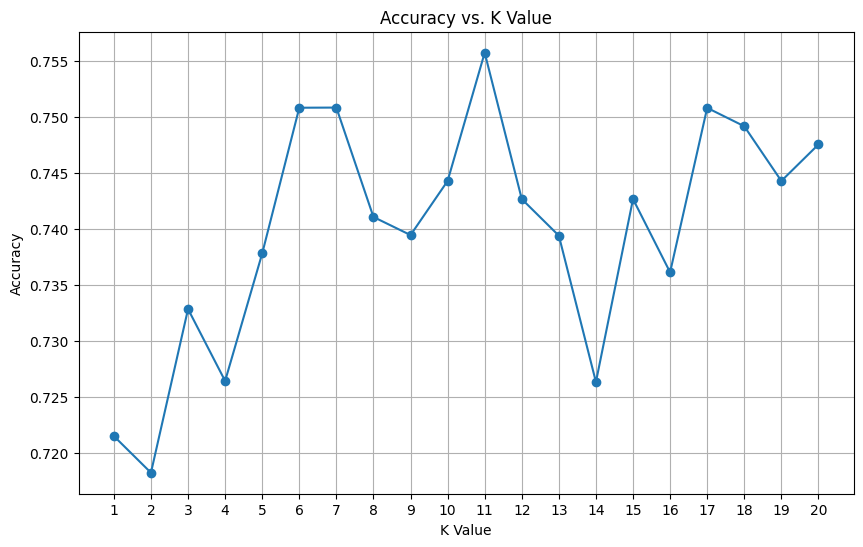

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [25]:
knn_best = KNNClassifier(k=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

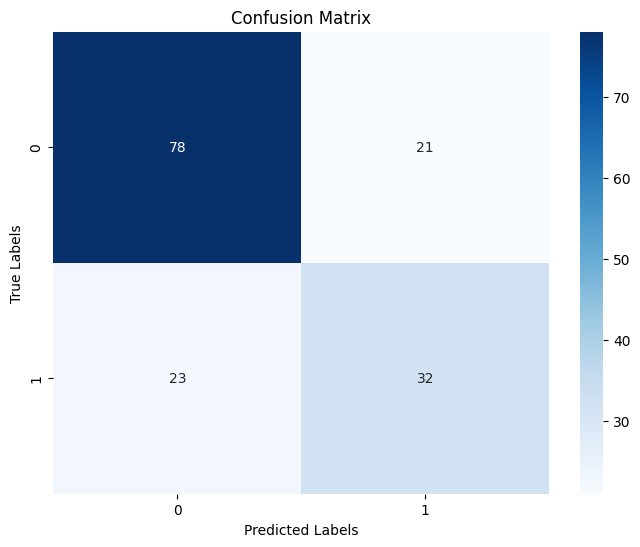

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [27]:
# Perform Leave-One-Out Cross Validation
loo = LeaveOneOut()
scores_loo = cross_val_score(knn_best, X_scaled, y, cv=loo, scoring='accuracy')

# Report mean and standard deviation of LOOCV
mean_accuracy_loo = np.mean(scores_loo)
std_accuracy_loo = np.std(scores_loo)
print(f"Mean accuracy (LOOCV): {mean_accuracy_loo:.2f}")
print(f"Standard deviation (LOOCV): {std_accuracy_loo:.2f}")


Mean accuracy (LOOCV): 0.75
Standard deviation (LOOCV): 0.43


The K-Nearest Neighbors (KNN) classifier's performance was assessed using a confusion matrix: TP: 32 | TN: 78 | FP: 21 | FN: 23
The accuracy of the KNN classifier was evaluated using 5-fold cross-validation and different K values. The graph illustrated the accuracy trend: Optimal K value: 11, yielding an accuracy of ~75%.
This classifier demonstrates reasonable accuracy in classifying instances in the diabetes dataset. The updated confusion matrix provides insights into the specific types of classification errors made by the model. Through cross-validation and analysis of different K values, we identified an optimal K value of 11 that balances bias and variance, leading to improved accuracy. However, the Leave-One-Out Cross Validation results highlight the potential variability in the model's performance, indicating areas for improvement.